In [2]:
# Reference : https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3
# Tutorial missing value : https://chrisalbon.com/python/data_wrangling/pandas_missing_data/
# Try to read this reference : http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
#                            : http://dacatay.com/data-science/part-4-time-series-prediction-arima-python/
import os  # Library for setting up the working dir
os.chdir('C:\\Users\\S719789\\Desktop\\Data Science\\Random Learnings\\Time Series\\Reference')
cw=os.getcwd()

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import warnings
import itertools

print('Current Working Dir %s' %cw)

C:\Users\S719789\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Current Working Dir C:\Users\S719789\Desktop\Data Science\Random Learnings\Time Series\Reference


In [3]:
# Load the data 
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Basic checks
data.head()
data.rename(columns = {'#Passengers':'Passengers'},inplace = True )
print('Type of Column : Month      :: %s' %type(data.Month))
print('Type of Column : Passengers :: %s' %type(data.Passengers))
            


Type of Column : Month      :: <class 'pandas.core.series.Series'>
Type of Column : Passengers :: <class 'pandas.core.series.Series'>


In [5]:
# Changing Month as Date column and indexing it
data.Month = pd.to_datetime(data.Month)
data.set_index('Month', inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# Missing Value check
data.isnull().sum()

Passengers    0
dtype: int64

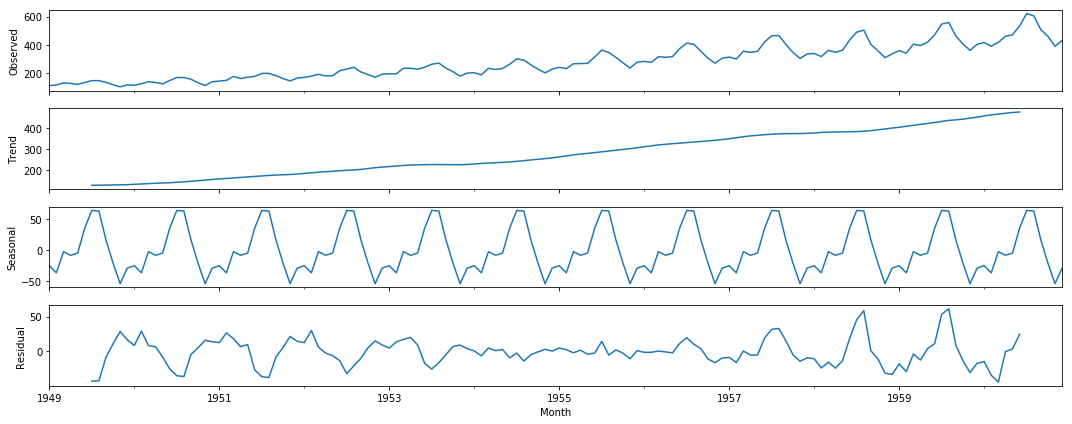

In [7]:
# Plot Decomposition
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
decomposition

In [9]:
# ARIMA(s) Model Grid search program
# Define the p, d and q parameters to take any value between 0 and 2
p=d=q = range(0,2)
import warnings
import itertools
# Generate all different combinations of p, q and q triplets
pdq=list(itertools.product(p,d,q))
print(pdq)
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
print(seasonal_pdq)
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
# Use the below other Alternative methond
'''
warnings.filterwarnings("ignore") # specify to ignore warning messages
aic_list=[]
param_list=[]
seasonal_list=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic_list.append(results.aic)
            param_list.append(param)
            seasonal_list.append(param_seasonal)
        except:
            continue
print('Printing the best fit parameters :: \n')
print('Best AIC   :: {}.'.format(min(aic_list)) )
print('Index value of Best AIC :: {}.'.format(aic_list.index(min(aic_list))) )
'''


Printing the best fit parameters :: 

Best AIC   :: 920.3192974989314.
Index value of Best AIC :: 27.


In [50]:
'''
print('Printing the best fit parameters :: \n')
print('Best AIC   :: {}.'.format(min(aic_list)) )
print("Best Param :: {}.".format(param_list[27]))
print('Best Param_seasonal :: {}.'.format(seasonal_list[27])) 
'''


Printing the best fit parameters :: 

Best AIC   :: 920.3192974989314.
Best Param :: (0, 1, 1).
Best Param_seasonal :: (1, 1, 1, 12).


In [56]:
## Alternative and better method to find best AIC
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_model = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = tmp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_model
        except:
            #print('Unexpected error :', sys.exc_info()[2])
            continue
print('Printing the best fit parameters :: \n')
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Printing the best fit parameters :: 

Best SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 model - AIC:920.3192974989314


In [62]:
# Best on the above Grid search - use the optimal parameters
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(0,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.160
Date:                            Sat, 07 Jul 2018   AIC                            920.319
Time:                                    13:16:59   BIC                            932.199
Sample:                                01-01-1949   HQIC                           925.146
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285   

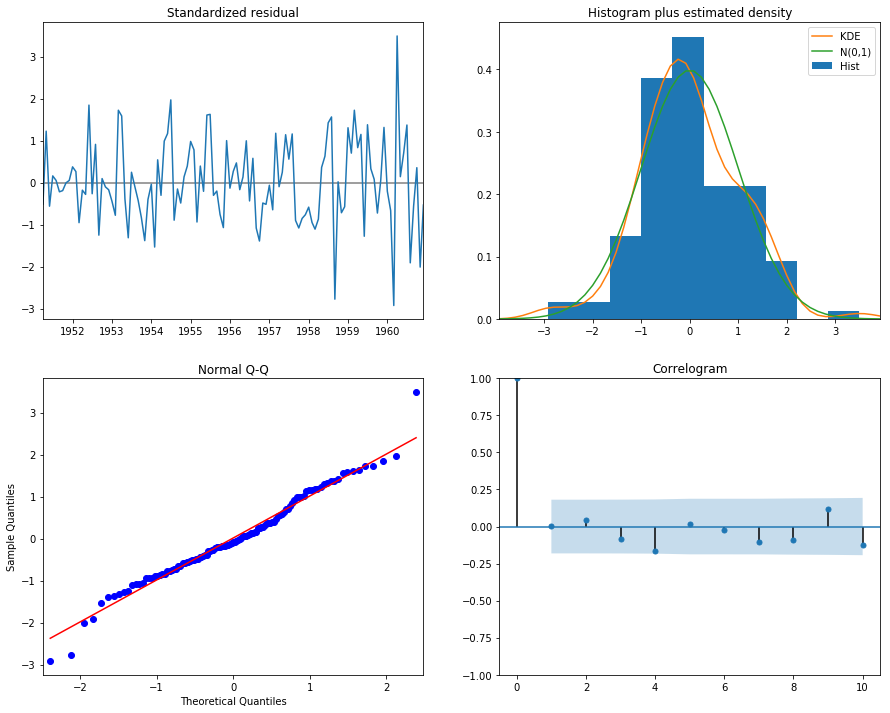

In [63]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [84]:
pred = results.get_prediction(start=pd.to_datetime('1960-01-01'), dynamic=False)
pred_ci = pred.conf_int()

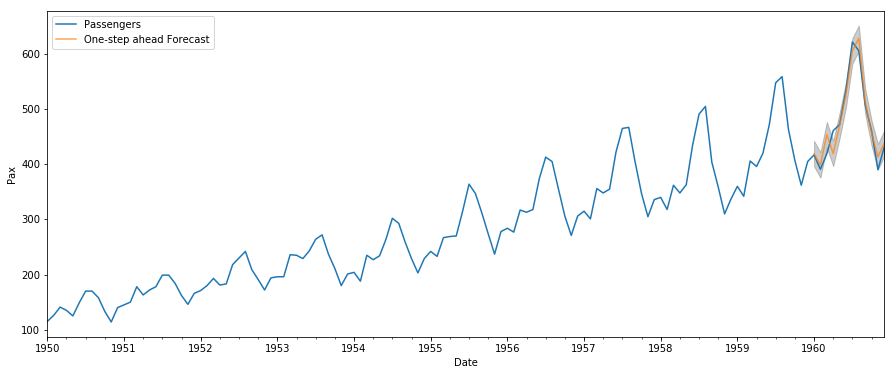

In [85]:
ax = data['1950':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Pax')
plt.legend()

plt.show()

In [129]:
# dir(pred) -- Tells all the available attributes
data_forecasted = pred.predicted_mean  # Series
data_truth = data['1960-01-01':]   # its a DF, so we convert it into series to do arithmetic operations
data_truth = data_truth['Passengers'] 
mse = ((data_forecasted-data_truth) ** 2).mean()
print(' The Mean Squared error of our forecast is {}.'.format(round(mse,2)))


 The Mean Squared error of our forecast is 374.73.


In [109]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.160
Date:                            Sat, 07 Jul 2018   AIC                            920.319
Time:                                    21:56:06   BIC                            932.199
Sample:                                01-01-1949   HQIC                           925.146
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285     -1.967      0.049      -1.117      -0.002
ma.S.L12       0.4077      0.336      1.212      0.225      -0.251       1.067
sigma2       140.2869     18.080      7.759      0.000     104.852     175.722
===================================================================================
Ljung-Box (Q):                       61.99   Jarque-Bera (JB):                 3.95
Prob(Q):                              0.01   Prob(JB):                         0.14
Heteroskedasticity (H):               2.51   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
dir(pred)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'conf_int',
 'df',
 'dist',
 'dist_args',
 'link',
 'linpred',
 'model',
 'predicted_mean',
 'prediction_results',
 'row_labels',
 'se_mean',
 'se_obs',
 'summary_frame',
 't_test',
 'tvalues',
 'var_pred_mean',
 'var_resid']

In [111]:
pred.prediction_results

In [112]:
pred.predicted_mean

1960-01-01    419.385964
1960-02-01    398.845773
1960-03-01    453.632204
1960-04-01    419.604807
1960-05-01    470.295052
1960-06-01    526.605528
1960-07-01    605.724120
1960-08-01    628.596411
1960-09-01    514.633982
1960-10-01    456.758920
1960-11-01    413.795935
1960-12-01    438.283327
Freq: MS, dtype: float64

In [95]:
pred.predicted_results

AttributeError: 'PredictionResults' object has no attribute 'predicted_results'

In [37]:
min(aic_list)

920.3192974989314

In [38]:
aic_list.index(min(aic_list))

27

In [33]:
m=min(aic_list)
print(aic_list[27])
print(param_list[min(aic_list)])
print(seasonal_list[min(aic_list)])

920.3192974989314


TypeError: list indices must be integers or slices, not numpy.float64

In [24]:
aic_list

[]

In [21]:
print(min(aic_list))
print(aic_list.index(min(aic_list)))
print(aic_list[27])
print(type(aic_list))
print(type(param))
print(param()[27])
#print(param_seasonal[27])

920.3192974989314
27
920.3192974989314
<class 'list'>
<class 'tuple'>


TypeError: 'tuple' object is not callable

In [10]:
type(data.Month)

pandas.core.series.Series